## Deep Learning Image Classificatin (KERAS)

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay

### Descripción

El objetivo es usar keras para la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

voy a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

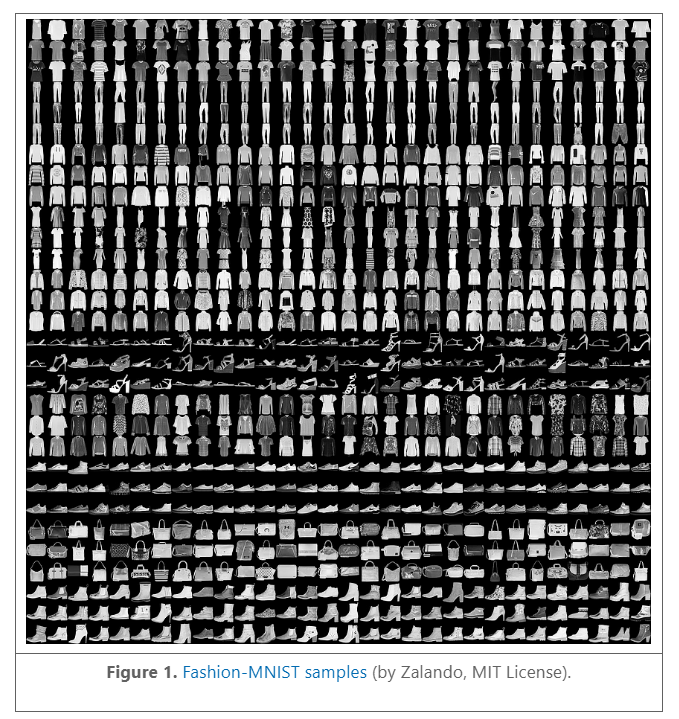

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, construiré una lista un que permita mapear la clase a el tipo literal.

In [38]:

# Cargar FASHION_MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [39]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [40]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
# Función para visualizar imágenes del dataset con su etiqueta correspondiente

def show_images_batch(clothes, n_cols, labels = [], names = class_names):
    n_rows = ((len(clothes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * 2, n_rows * 2.2))
    for index, cloth in enumerate(clothes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(cloth, cmap = "Greys")
        plt.axis("off")
        if len(labels):
            plt.title(names[labels[index]])

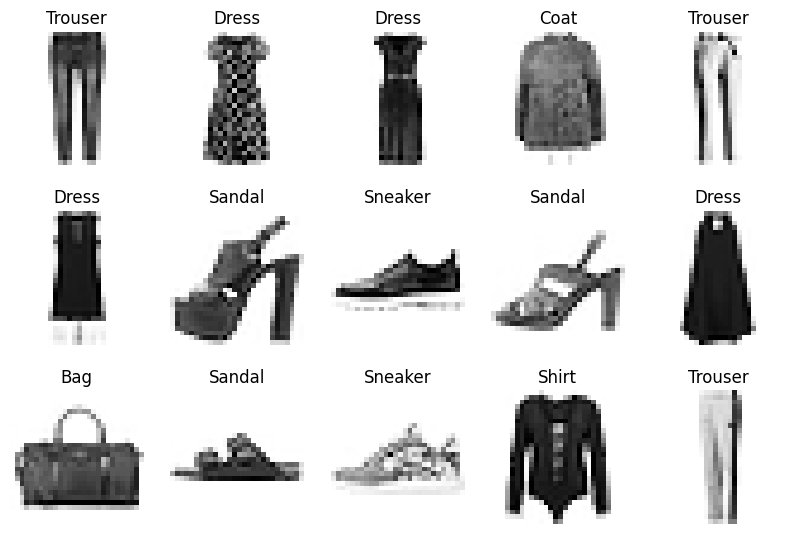

In [43]:
# vista previa de las imágenes

indices = np.random.randint(0,60000,15)
show_images_batch(train_images[indices],labels = train_labels[indices], n_cols = 5)

In [44]:
# Distribución de las clases:

pd.Series([class_names[label] for label in train_labels]).value_counts(True)

Ankle boot     0.1
T-shirt/top    0.1
Dress          0.1
Pullover       0.1
Sneaker        0.1
Sandal         0.1
Trouser        0.1
Shirt          0.1
Coat           0.1
Bag            0.1
Name: proportion, dtype: float64

In [45]:
# Escalado de los datos (al ser los datos de los pixeles de las imagenes valores en escala de grises entre 0 y 255, al dividir entre 255 tenemos el mismo resultado que al utilizar un MinMaxScaler())
train_images = train_images/255
test_images = test_images/255

In [46]:
# Modelo de 1 capa densa:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')  
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
early_stopping = keras.callbacks.EarlyStopping(patience=50, 
                                                  restore_best_weights=True,
                                                  monitor = "val_loss")
                    

In [48]:
history = model.fit(train_images, train_labels, batch_size= 128 ,epochs=300, validation_split=0.2, callbacks=([early_stopping]), verbose=1)

Epoch 1/300
375/375 [==============================] - 1s 2ms/step - loss: 0.5953 - accuracy: 0.7953 - val_loss: 0.4549 - val_accuracy: 0.8383
Epoch 2/300
375/375 [==============================] - 1s 1ms/step - loss: 0.4256 - accuracy: 0.8520 - val_loss: 0.4132 - val_accuracy: 0.8544
Epoch 3/300
375/375 [==============================] - 1s 1ms/step - loss: 0.3807 - accuracy: 0.8661 - val_loss: 0.4030 - val_accuracy: 0.8585
Epoch 4/300
375/375 [==============================] - 1s 1ms/step - loss: 0.3571 - accuracy: 0.8737 - val_loss: 0.3642 - val_accuracy: 0.8720
Epoch 5/300
375/375 [==============================] - 1s 1ms/step - loss: 0.3362 - accuracy: 0.8790 - val_loss: 0.3596 - val_accuracy: 0.8669
Epoch 6/300
375/375 [==============================] - 1s 1ms/step - loss: 0.3189 - accuracy: 0.8837 - val_loss: 0.3940 - val_accuracy: 0.8587
Epoch 7/300
375/375 [==============================] - 1s 1ms/step - loss: 0.3026 - accuracy: 0.8912 - val_loss: 0.3419 - val_accuracy: 0.8770

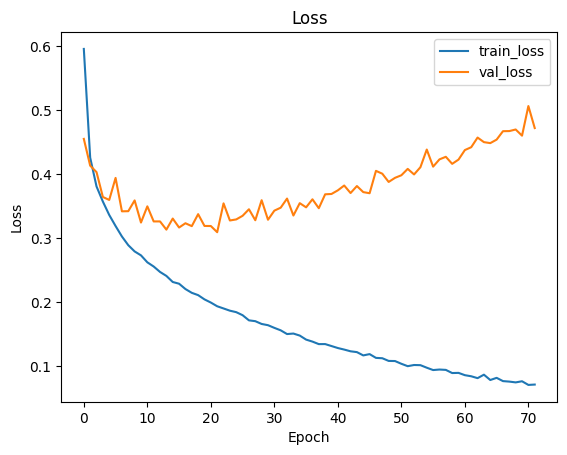

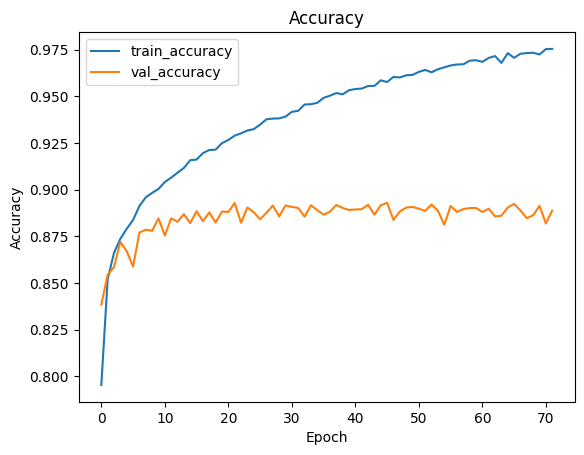

In [49]:
# Gráfico de pérdida
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.888700008392334


In [51]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=class_names))


313/313 [==============================] - 0s 559us/step
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.90      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.82      0.80      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.82      0.81      0.81      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.77      0.65      0.71      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



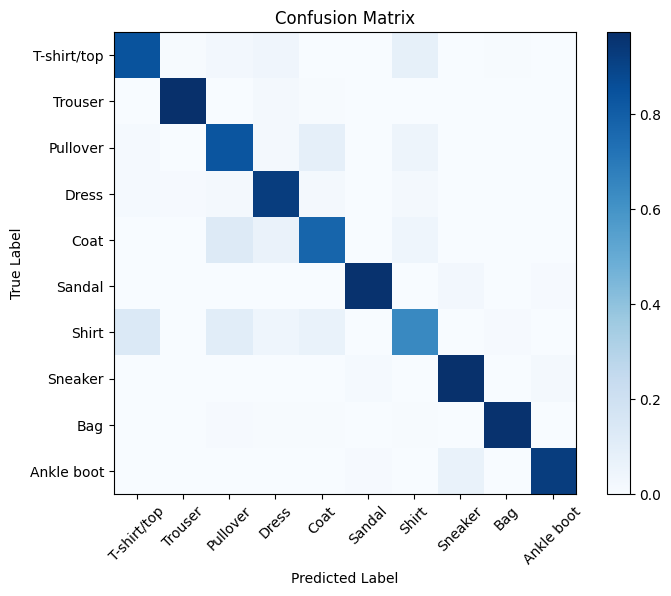

In [91]:
conf_matrix = confusion_matrix(test_labels, predicted_labels, normalize= "true")
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [73]:
# Modelo de 2 capas densas:

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation = "relu"), 
    keras.layers.Dense(10, activation='softmax')  
])


model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
early_stopping_2 = keras.callbacks.EarlyStopping(patience=50, 
                                                  restore_best_weights=True,
                                                  monitor = "val_loss")
                    

In [75]:
history_2 = model_2.fit(train_images, train_labels, batch_size= 128 ,epochs=300, validation_split=0.2, callbacks=([early_stopping_2]), verbose=1)

Epoch 1/300
375/375 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.8047 - val_loss: 0.4550 - val_accuracy: 0.8414
Epoch 2/300
375/375 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8584 - val_loss: 0.3723 - val_accuracy: 0.8677
Epoch 3/300
375/375 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8721 - val_loss: 0.3712 - val_accuracy: 0.8662
Epoch 4/300
375/375 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8817 - val_loss: 0.3395 - val_accuracy: 0.8798
Epoch 5/300
375/375 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8879 - val_loss: 0.3369 - val_accuracy: 0.8804
Epoch 6/300
375/375 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.8913 - val_loss: 0.3325 - val_accuracy: 0.8811
Epoch 7/300
375/375 [==============================] - 1s 2ms/step - loss: 0.2802 - accuracy: 0.8969 - val_loss: 0.3245 - val_accuracy: 0.8813

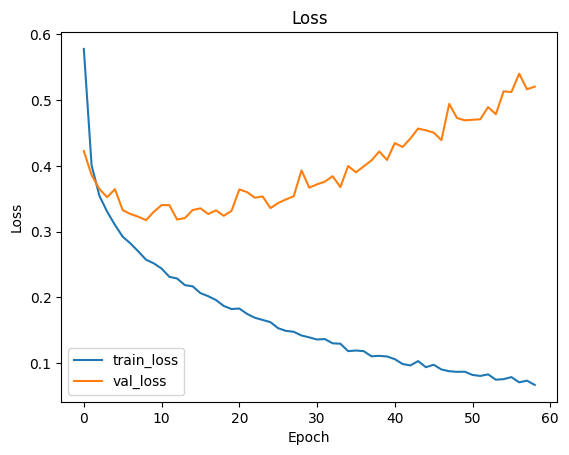

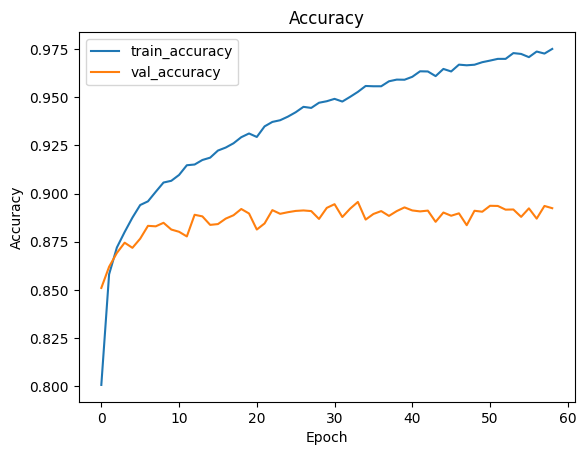

In [68]:
# Gráfico de pérdida
plt.plot(history_2.history['loss'], label='train_loss')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfico de precisión
plt.plot(history_2.history['accuracy'], label='train_accuracy')
plt.plot(history_2.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
test_loss, test_accuracy = model_2.evaluate(test_images, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8790000081062317


In [71]:
predictions_2 = model_2.predict(test_images)
predicted_labels = np.argmax(predictions_2, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=class_names))


313/313 [==============================] - 0s 543us/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.75      0.83      0.79      1000
       Dress       0.83      0.92      0.87      1000
        Coat       0.81      0.77      0.79      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.77      0.64      0.70      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.97      0.92      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



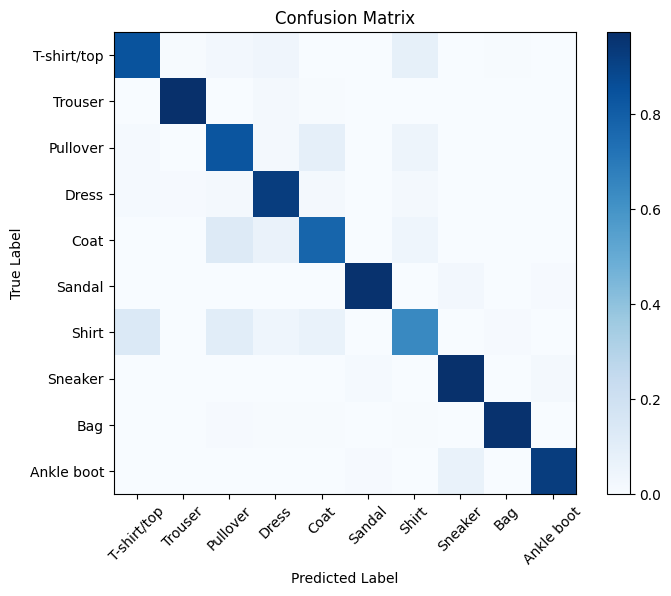

In [89]:
conf_matrix = confusion_matrix(test_labels, predicted_labels, normalize= "true")
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Los dos modelos tienen una precisión y perdida practicamente iguales, en ambos la clase con mas errores es "shirt", que son confundidas mayormente con "t-shirt", "pullover", y "coat".
a excepción de esta clase, da bastante buen resueltado con el resto de predicciones.

In [100]:
# Visualización de los fallos:

In [95]:
df_ys = pd.DataFrame({"True": test_labels, "Predicted": predicted_labels})

In [97]:
df_ys

,True,Predicted
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [96]:
fallos = df_ys["True"] != df_ys["Predicted"]
aciertos = fallos == False
clase_6_pres = df_ys["Predicted"] == 6
clase_2_real = df_ys["True"] == 2
clase_0_real = df_ys["True"] == 0
clase_4_pres = df_ys["Predicted"] == 4

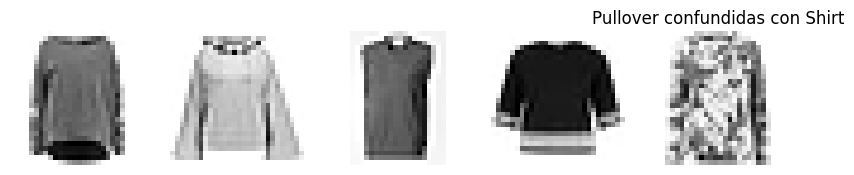

In [98]:
show_images_batch(test_images[df_ys[clase_6_pres & clase_2_real].sample(5).index], n_cols = 5)
plt.title(f"{class_names[2]} confundidas con {class_names[6]}");

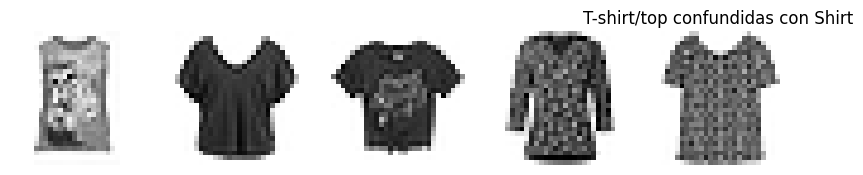

In [99]:
show_images_batch(test_images[df_ys[clase_6_pres & clase_0_real].sample(5).index], n_cols = 5)
plt.title(f"{class_names[0]} confundidas con {class_names[6]}");

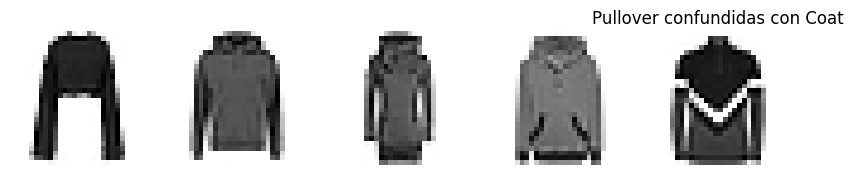

In [101]:
show_images_batch(test_images[df_ys[clase_4_pres & clase_2_real].sample(5).index], n_cols = 5)
plt.title(f"{class_names[2]} confundidas con {class_names[4]}");

In [102]:
# Función para visualizar el nivel de confianza:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

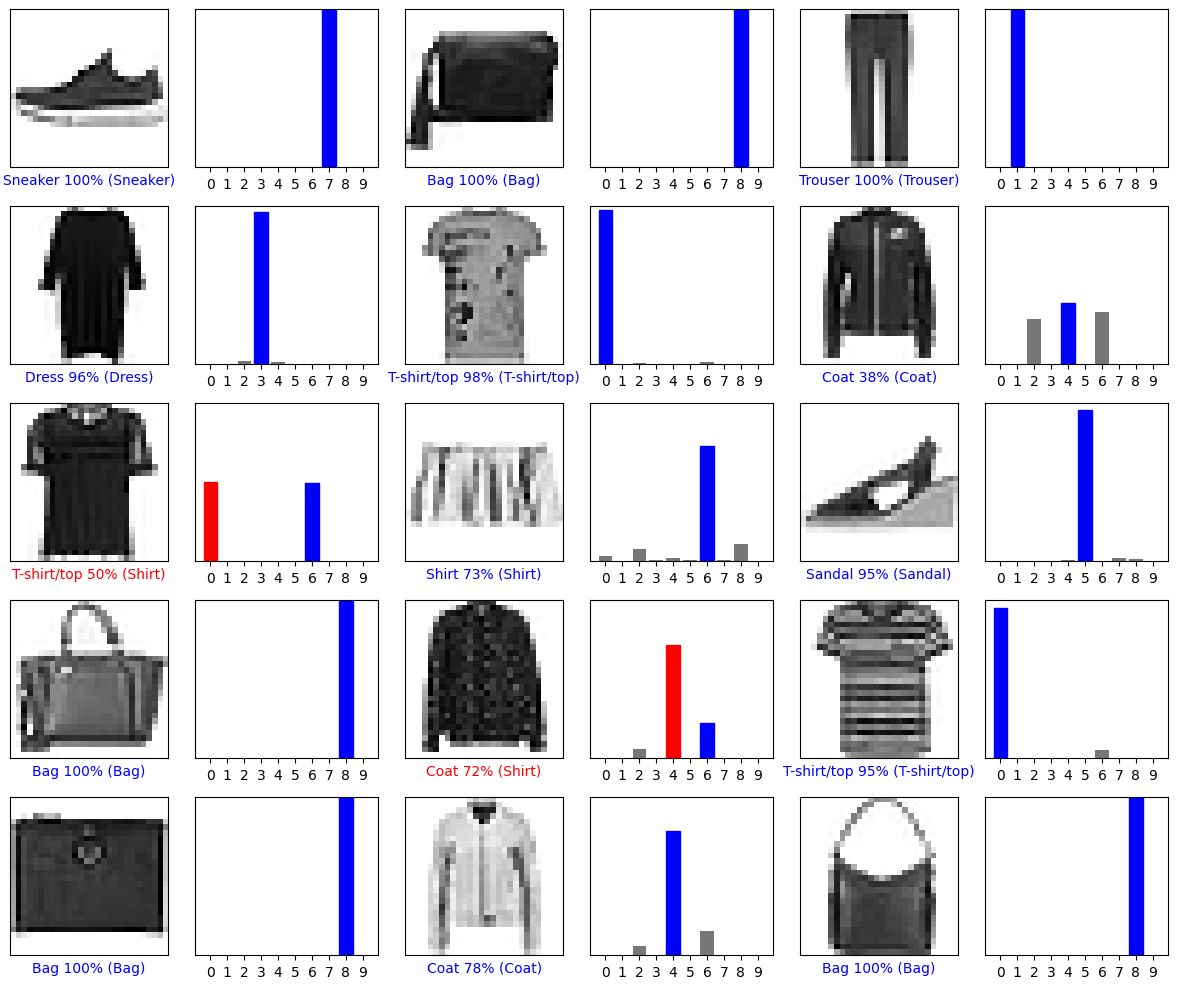

In [108]:
# Pintamos las primeras imágenes, la etiqueta predicha, y la real.
# Las predicciones correctas en azul y las incorrectas en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i, j in enumerate(np.random.randint(0, 10000, (15,))):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(j, predictions[j], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()